# Benchmark with the 20 newsgroups dataset

Computed on Intel i5-6600 3.3 GHz, 16 GB RAM, Ubuntu Linux 14.04

In [1]:
%matplotlib inline
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),categories=categories)
vectorizer = TfidfVectorizer()
vectors_training = vectorizer.fit_transform(newsgroups_train.data)
vectors_training_targets = newsgroups_train.target

newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier 
estimator = SGDClassifier()
selector = RFE(estimator, None, step=.5)
X = selector.fit_transform(vectors_test, newsgroups_test.target)




In [30]:
print "training size: ", vectors_training.shape
print "Approximate number of non-zero features: ", vectors_training.nnz / float(vectors_training.shape[0])
print "test size: ", X.shape
print "Approximate number of non-zero features: ", X.nnz / float(X.shape[0])

training size:  (2034, 26879)
Approximate number of non-zero features:  96.7059980334
test size:  (1353, 13439)
Approximate number of non-zero features:  93.4249815225


### Optimized for accuracy >= 0.95

In [31]:
n_neighbors = 10
max_bin_size= 45
shingle_size = 1
similarity=False
number_of_cores=4
prune_inverse_index=14
store_value_with_least_sigificant_bit=0
excess_factor=10
prune_inverse_index_after_instance=0.0
remove_hash_function_with_less_entries_as=0
shingle=0
block_size=1
minHashOptimal = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [32]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(X, minHashOptimal, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[100, 200, 400, 600, 800, 1000])

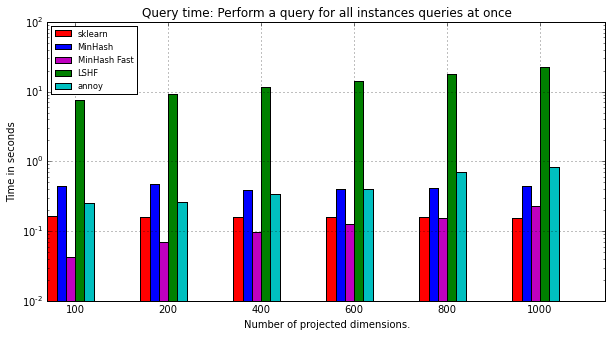

In [33]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "MinHash", "MinHash Fast", "LSHF", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

#### One query to get the nearest neighbors of all instances.
* LSHF performs very bad
* MinHash Fast is fastest algorithm for less than 600 dimensions
* For more than 800 dimensions all algorithms performe worse than the brute force one.

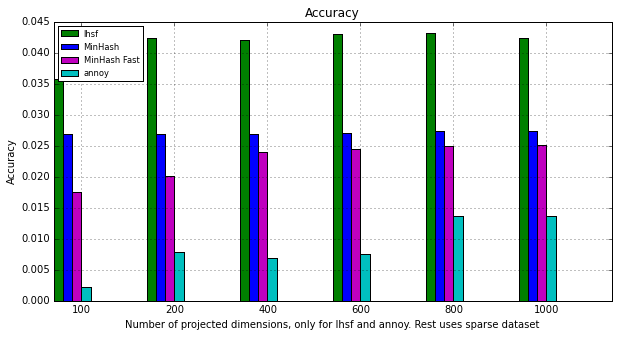

In [34]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "MinHash", "MinHash Fast", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* Accuracy level of all algorithms is very bad
* MinHash Fast is having a better accuracy than MinHash!?

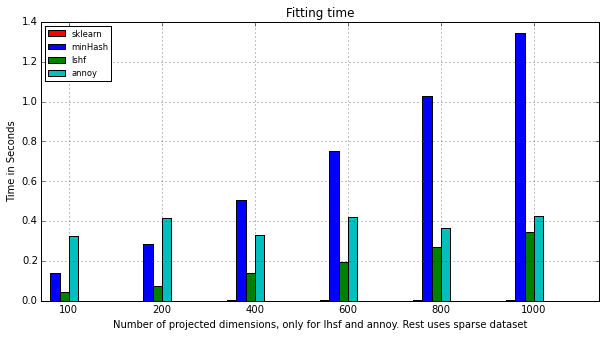

In [9]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting time from MinHash is by far the most time consuming
* LSHF is faster than annoy
* Increase of the fitting time from MinHash grows significant more than annoy or LSHF

### Optimized for accuracy >= 0.9

In [15]:
n_neighbors = 10
max_bin_size= 86
shingle_size = 1
similarity=False
number_of_cores=4
prune_inverse_index=10
store_value_with_least_sigificant_bit=3
excess_factor=5
prune_inverse_index_after_instance=1.0
remove_hash_function_with_less_entries_as=0
shingle=0
block_size=1
minHashNinety = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [16]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(vectors_test, minHashNinety, n_neighbors_sklearn, n_neighbors_minHash, 
                                    number_of_hashfunctions=[100, 200, 400, 600, 800, 1000], 
                                    size_of_query=None)

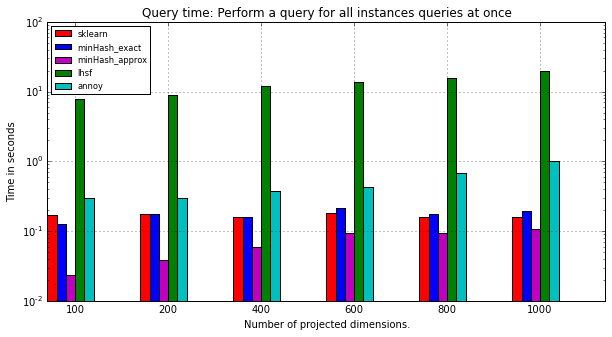

In [17]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

 * Annoy and MinHash performing worse than the brute force algorithm
 * MinHash Fast is always faster than the brute force algorithm

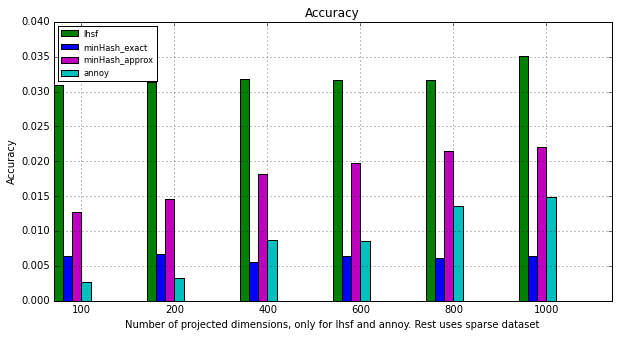

In [18]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* Accuracy for all algorithms is bad

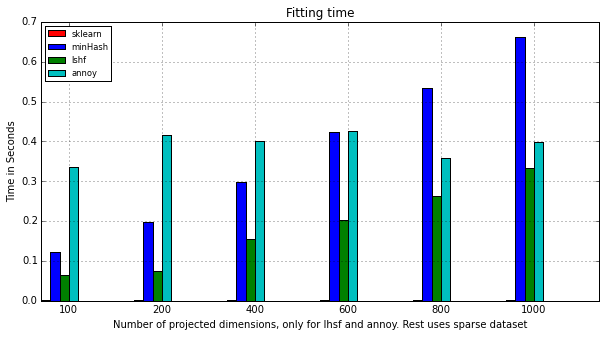

In [19]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting times for annoy are longer than usual.
* Fitting time for MinHash is as expected.

### Optimized for accuracy >= 0.7

In [20]:
n_neighbors = n_neighbors_minHash
max_bin_size= 54
shingle_size = 4
similarity=False
number_of_cores=4
prune_inverse_index=0
store_value_with_least_sigificant_bit=1
excess_factor=8
prune_inverse_index_after_instance=0.0
remove_hash_function_with_less_entries_as=0
shingle=1
block_size=4
minHashSeventy = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [21]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(vectors_test, minHashSeventy, n_neighbors_sklearn, n_neighbors_minHash, 
                                    number_of_hashfunctions=[100, 200, 400, 600, 800, 1000], 
                                    size_of_query=None)

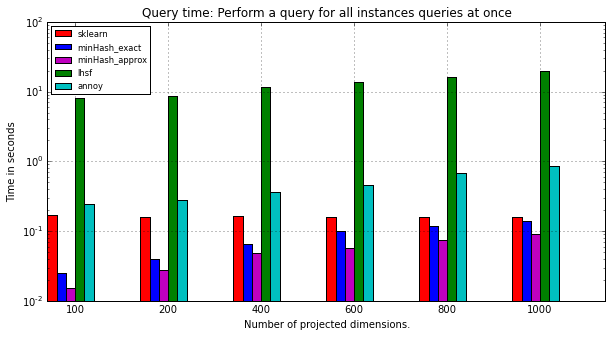

In [22]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

 * Performance for the both MinHash algorithms is the first time better than the brute force algorithm
 * Annoy and LSHF are worse than the brute force algorithm

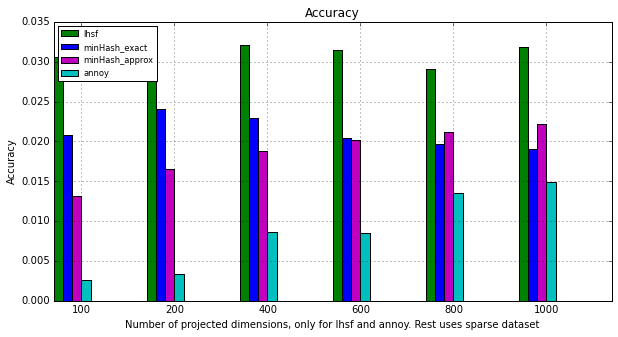

In [23]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* Accuracy for MinHash is now better than before (!!!) but still bad.

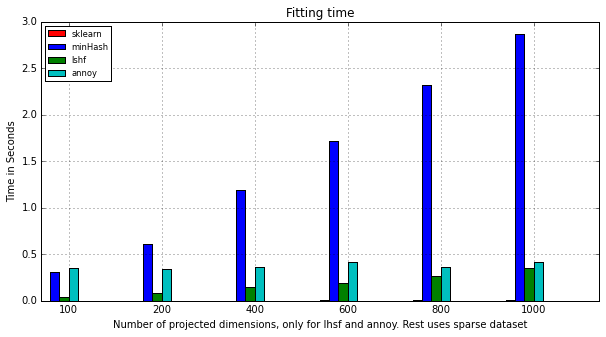

In [24]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting times are now as expected.